# Essentials

In [34]:
# importy, funkcje
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from json import dump
from grouping import combined, get_node_info_by_id

NODE_A = 0
NODE_B = 1
SPRING_LAYOUT_K = 0.65
SPRING_LAYOUT_ITERATIONS = 40

def draw_weighted_graph_different_nodes(data1: list, data2: list, large=0.4, medium=0.3):
    # round weights and get rid of 1.0 weight caused by 0 sources/citations
    data1 = [[el[0], el[1], round(el[2], 3)] for el in data1 if el[2] != 1.0]
    data2 = [[el[0], el[1], round(el[2], 3)] for el in data2 if el[2] != 1.0]

    G = nx.Graph()
    G.add_weighted_edges_from(data1 + data2)

    # color first dataset differently from the second
    first_dataset_nodes = [el[0] for el in data1] + [el[1] for el in data1]
    first_dataset_nodes = list(np.unique(first_dataset_nodes))
    color_map = list()
    for node in G:
        if node in first_dataset_nodes:
            color_map.append('blue')
        else:
            color_map.append('green')
        
    
    elarge = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] > large]
    emedium = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] <= large and d["weight"] > medium]
    esmall = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] <= medium]
    # pos = nx.planar_layout(G, scale=1)
    pos = nx.spring_layout(G, k=SPRING_LAYOUT_K, iterations=SPRING_LAYOUT_ITERATIONS)

    # nodes
    nx.draw_networkx_nodes(G, pos, node_color=color_map)

    # edges
    nx.draw_networkx_edges(G, pos, edgelist=elarge, alpha=0.5, width=4)
    nx.draw_networkx_edges(
        G, pos, edgelist=emedium, width=3, alpha=0.5, edge_color='r'
    )
    nx.draw_networkx_edges(
        G, pos, edgelist=esmall, width=2, alpha=0.5, edge_color='b'
    )

    # node labels
    nx.draw_networkx_labels(G, pos)
    # edge weight labels
    # edge_labels = nx.get_edge_attributes(G, 'weight')
    # nx.draw_networkx_edge_labels(G, pos, edge_labels)

    ax = plt.gca()
    ax.margins(0.08)
    plt.axis("off")
    plt.tight_layout()
    plt.show()

def draw_weighted_graph(data: list, large=0.4, medium=0.3):
    # round weights and eliminate 1.0 weight caused by 0 sources/citations
    data = [[el[0], el[1], round(el[2], 3)] for el in data if el[2] != 1.0]

    G = nx.Graph()
    G.add_weighted_edges_from(data)
    
    elarge = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] > large]
    emedium = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] <= large and d["weight"] > medium]
    esmall = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] <= medium]
    # pos = nx.planar_layout(G, scale=1)
    pos = nx.spring_layout(G, k=SPRING_LAYOUT_K, iterations=SPRING_LAYOUT_ITERATIONS)

    # nodes
    nx.draw_networkx_nodes(G, pos)

    # edges
    nx.draw_networkx_edges(G, pos, edgelist=elarge, alpha=0.8, width=4, edge_color='r')
    nx.draw_networkx_edges(
        G, pos, edgelist=emedium, width=3, alpha=0.5, edge_color='g'
    )
    nx.draw_networkx_edges(
        G, pos, edgelist=esmall, width=2, alpha=0.3
    )

    # node labels
    nx.draw_networkx_labels(G, pos)
    # edge weight labels
    # edge_labels = nx.get_edge_attributes(G, 'weight')
    # nx.draw_networkx_edge_labels(G, pos, edge_labels)

    ax = plt.gca()
    ax.margins(0.08)
    plt.axis("off")
    plt.tight_layout()
    plt.show()

def draw_weighted_graph_with_weights(data: list, large=0.4, medium=0.3):
    # round weights and eliminate 1.0 weight caused by 0 sources/citations
    data = [[el[0], el[1], round(el[2], 3)] for el in data if el[2] != 1.0]

    G = nx.Graph()
    G.add_weighted_edges_from(data)
    
    elarge = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] > large]
    emedium = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] <= large and d["weight"] > medium]
    esmall = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] <= medium]
    # pos = nx.planar_layout(G, scale=1)
    pos = nx.spring_layout(G, k=SPRING_LAYOUT_K, iterations=SPRING_LAYOUT_ITERATIONS)

    # nodes
    nx.draw_networkx_nodes(G, pos)

    # edges
    nx.draw_networkx_edges(G, pos, edgelist=elarge, alpha=0.5, width=4)
    nx.draw_networkx_edges(
        G, pos, edgelist=emedium, width=3, alpha=0.5, edge_color='r'
    )
    nx.draw_networkx_edges(
        G, pos, edgelist=esmall, width=2, alpha=0.5, edge_color='b'
    )

    # node labels
    nx.draw_networkx_labels(G, pos)
    # edge weight labels
    edge_labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels)

    ax = plt.gca()
    ax.margins(0.08)
    plt.axis("off")
    plt.tight_layout()
    plt.show()

def draw_graph(data: list):
    data_without_weights = [[el[NODE_A], el[NODE_B]] for el in data]
    G = nx.Graph()
    G.add_edges_from(data_without_weights)
    nx.draw(G, with_labels=True, font_weight='bold')

def draw_table(data, no_of_elements=10):
    data_pd = pd.DataFrame(data, columns=["Ch1", "Ch2", "weight"])
    print(data_pd.head(no_of_elements))

def print_graph_info(G):
    number_of_nodes = len(G)
    number_of_edges = G.number_of_edges()
    print(f"{number_of_nodes=}, {number_of_edges=}, {nx.is_connected(G)=}, {nx.number_connected_components(G)=}")

def get_channels_info_bulk(ids):
    result = [get_node_info_by_id(id) for id in ids]
    with open("channels_bulks/bulk.json", "w") as f:
        dump(result, f)

# Usage
# draw_graph(data)
# draw_weighted_graph(data)
# draw_table(data)

# Rozpoznanie danych

W celu zidentyfikowania (potwierdzenia) calkowitej liczby powiazan kanalow, wybrano kanaly:
- zweryfikowane i niezweryfikowane
- majace przynajmniej 0 subskrybentow i co najwyzej 10 000 000 000 subskrybentow
- majace przynajmniej 0 wspolnych zrodel w cytowaniach

In [50]:
# sprawdzic max liczbe cytowanych zrodel
data_m1_all = combined(mode=0, verified='all', popularity_lower=-1, popularity_upper=10_000_000_000, x=0)
print(f"Wszystkich dostepnych powiazan kanalow: {len(data_m1_all)}")

Wszystkich dostepnych powiazan kanalow: 5565


## Grupowanie kanalow wg zrodel
Aby wykonac takie grupowanie, nalezy najpierw przyjac ile wspolnych zrodel to malo, a ile to duzo. W tym celu zwiekszano prog, powyzej ktorego uwzgledniano wezly od 0 do momentu, w ktorym nie bylo juz zadnych polaczonych ze soba wezlow

In [32]:
common_sources_threshold_count = pd.DataFrame(columns=["nodes", "threshold"])
threshold = 0
while True:
    data = combined(mode=0, verified='all', popularity_lower=-1, popularity_upper=10_000_000_000, x=threshold)
    if len(data) == 0:
        break
    common_sources_threshold_count.loc[len(common_sources_threshold_count)] = [len(data), threshold]
    threshold += 1

Liczba wspólnych kanałów wraz ze wzrostem parametru threshold wygląda następująco:      

<AxesSubplot:xlabel='threshold'>

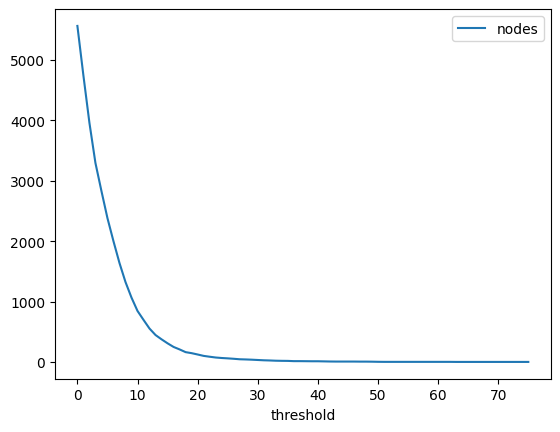

In [33]:
common_sources_threshold_count.plot(x='threshold', y='nodes')

Widoczne jest,że większość powiązanych kanałów ma jedynie kilka wspólnych źródeł, toteż na tym etapie założono, że do połączenia dwóch kanałów wystarczające jest jedno wspólne źródło                           

<AxesSubplot:ylabel='Frequency'>

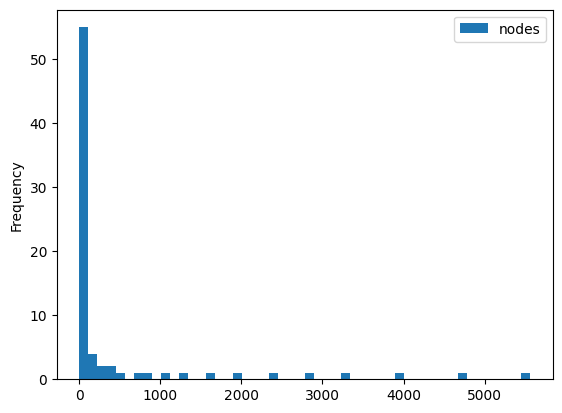

In [40]:
common_sources_threshold_count.plot.hist(x='threshold', y='nodes', bins=50)

Na tym etapie, krawędzie nie posiadają wag   

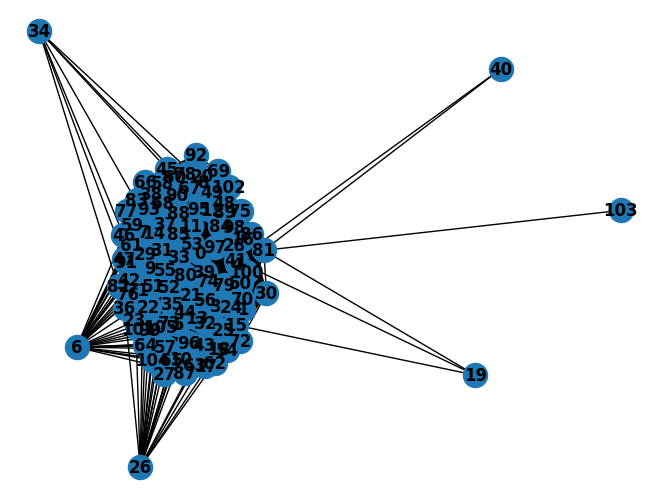

In [137]:
data = combined(mode=0, verified='all', popularity_lower=-1, popularity_upper=10_000_000_000, x=1)
draw_graph(data)

Utworzenie grafu bez wag

In [138]:
data_without_weights = [[el[NODE_A], el[NODE_B]] for el in data]
G = nx.Graph()
G.add_edges_from(data_without_weights)
print_graph_info(G)


number_of_nodes=104, number_of_edges=4744, nx.is_connected(G)=True, nx.number_connected_components(G)=1


W ten sposób powstał graf reprezentujący 104 kanały o 4744 powiązaniach      

In [139]:
for el in nx.selfloop_edges(G): print(el)

Dodatkowo sprawdzono czy nie ma kanalow, ktore jako powiazane wskazuja same na siebie. Nie bylo zadnego takiego przypadku, poniewaz API telegramu zwraca informacje o kanalach bez powtorzen

# TODO 
tutaj moze jakies wnioski? ktore kanaly tematycznie co i jak?

In [1]:
from grouping import get_name_by_id
get_name_by_id(0)

[[86, 101, 0.8222222222222222]]


{'channel_name': 'ASupersharij',
 'full_name': 'Анатолий Шарий',
 'verified': False,
 'cited_sources': [],
 'source_count': {},
 'n_all_citations': 0,
 'n_all_sources': 0}

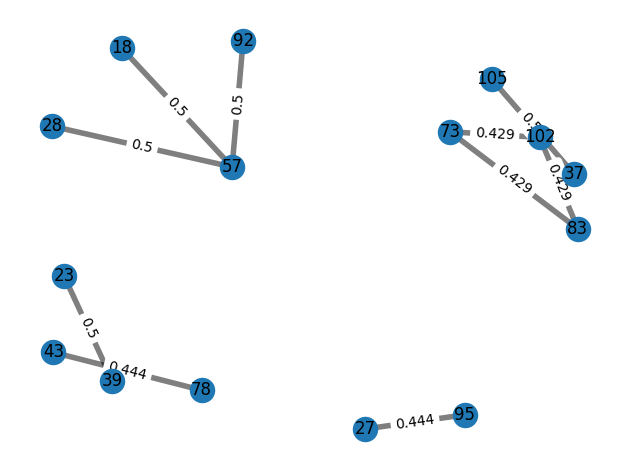

In [107]:
data = combined(mode=3, verified='all', popularity_lower=-1, popularity_upper=10_000_000_000, x=0.4)
draw_weighted_graph_with_weights(data)

czy da sie kolory zrobic, zeby pokazac na jednym verified i reszte

sa spokrewnione kanaly jesli maja wspolne cytowania i jest git jelsi bierzemy pod uwage procentowy udzial cytowan

byc moze tez liczbe cytowan



W celu pokazania powiazan, badamy jak pokazywac wezly na grafie za pomoca kolorow i ewentualnie algorytm node similarity

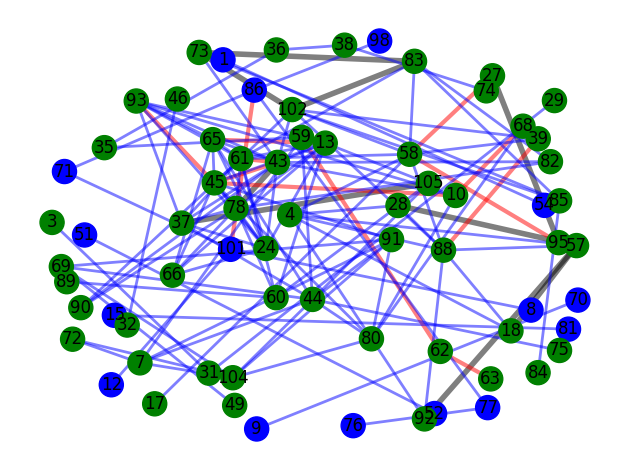

In [136]:
# test malowania z roznych datasetow
data1 = combined(mode=3, verified='verified', popularity_lower=-1, popularity_upper=10_000_000_000, x=0.2)
data2 = combined(mode=3, verified='nonverified', popularity_lower=-1, popularity_upper=10_000_000_000, x=0.2)
draw_weighted_graph_different_nodes(data1, data2)

# Kontynuacja wnioskow
Na grafie zaprezentowanym powyżej widać, że liczba powiazanych kanalow jest znaczna, zas wiekszosc z nich ma jedynie kilka wspolnych zrodel. Ponadto, w przypadku niektorych kanalow, duza ilosc wspolnych zrodel wynika z faktu, ze kanaly te ogolnie cytują sporo źródeł. Na potrzeby dalszej analizy, waga wynosi procent wspolnych zrodel wzgledem calkowitej liczby cytowanych zrodel i jesli jest rozna dla dwoch kanalow, brana pod uwage jest tylko mniejsza.    

# Analiza grafu z wagami znormalizowanymi wzgledem calkowitej liczby zrodel

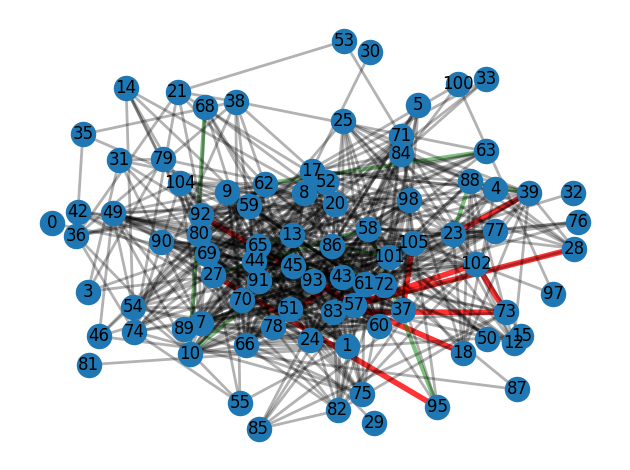

In [155]:
data = combined(3, verified='all', popularity_lower=0, popularity_upper=10_000_000_000, x=0.15)
draw_weighted_graph(data)

W dalszym ciagu liczba kanalow jest bardzo duza, totez stopniowo zwiekszano prog, ponizej ktorego waga zostawala uznana za zerowa. W celu wyznaczenia znaczacych relacji zastosowano trzy progi kolorowania krawedzi:
- powyzej 40% wspolnych cytowanych zrodel - czerwony kolor
- 30 - 40% wspolnych cytowanych zrodel - zielony kolor
- 30% lub mniej wspolnych cytowanych zrodel - czarny kolor

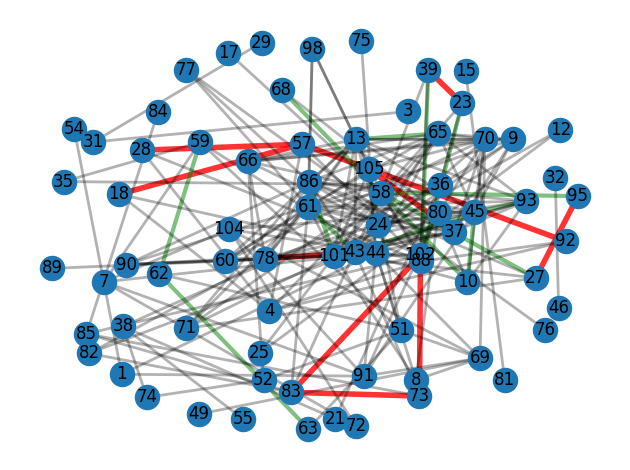

In [156]:
data = combined(3, verified='all', popularity_lower=0, popularity_upper=10_000_000_000, x=0.20)
draw_weighted_graph(data)

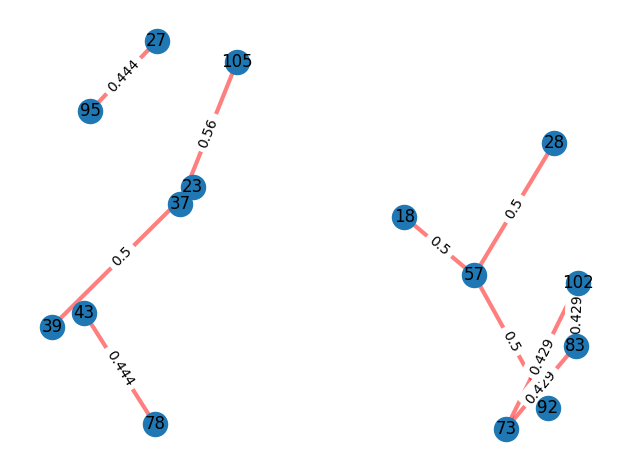

In [4]:
data = combined(3, verified='all', popularity_lower=0, popularity_upper=10_000_000_000, x=0.4)
draw_weighted_graph_with_weights(data, large=0.99)

Zaprezentowane wyzej kanaly maja powyzej 40% wspolnych zrodel. Graf zawiera 5 grup, a kanaly do nich nalezace zostaly zbadane.

Problemem takiego podejscia jest fakt, ze niektore kanaly (18, 28, 57) maja 1 lub 2 zrodla, totez ciezko tutaj mowic o podobienstwach tematycznych. Sa to kanaly traktujace o gieldzie kryptowalut binance, kanal udostepniajacy wiadomosci z twittera dot. Ukrainy oraz kanal osoby fizycznej, ktora rowniez udostepnia tweety. Nalezaloby tutaj uwzglednic podejscie zaprezentowane na poczatku, tj. uwzglednianie kanalow, ktore maja liczbe cytowan bezwzglednie powyzej jakiegos progu lub uwzglednienie popularnosci kanalu. W procesie dalszej analizy zastosowano to drugie podejscie ze wzgledu na fakt, ze popularnosc implikuje nie tylko wieksza ilosc zrodel, ale tez jakosc udostepnianych tresci. 

In [19]:
get_node_info_by_id(57)

{'channel_name': 'luhanskevaquation',
 'full_name': 'Луганская область эвакуация',
 'verified': False,
 'cited_sources': ['t.me', 'google.com'],
 'source_count': {'t.me': 1, 'google.com': 1},
 'n_all_citations': 2,
 'n_all_sources': 2}

## Kanaly popularne oraz malo popularne

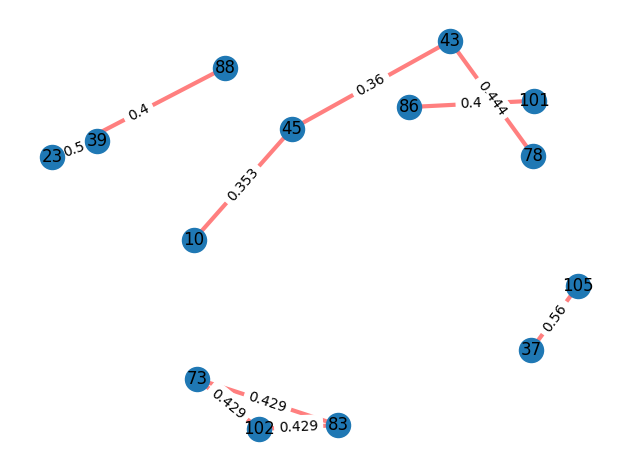

In [20]:
data = combined(3, verified='all', popularity_lower=1000, popularity_upper=10_000_000_000, x=0.35)
draw_weighted_graph_with_weights(data, large=0.99)

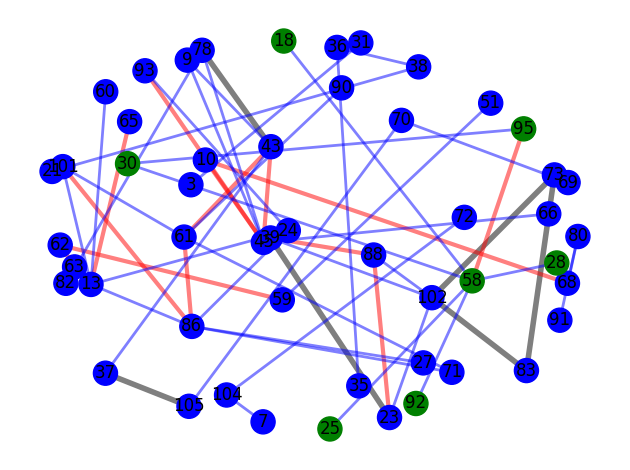

In [51]:
data1 = combined(3, verified='all', popularity_lower=1000, popularity_upper=10_000_000_000, x=0.25)
data2 = combined(3, verified='all', popularity_lower=1, popularity_upper=1000, x=0.1)
draw_weighted_graph_different_nodes(data1, data2)

### Popularnosc kanalow
Za kanaly popularne uznano kanaly, ktore maja ponad 1000 subskrybujacych. W przeciwnym razie kanal byl uznany za malo popularny. Kanaly popularne zostaly pokolorowane na niebiesko.

Wsrod kanalow popularnych w jednej z grup znalazly sie kanaly, ktore traktuja o wojnie, proponuja transfery pieniezne majace wesprzec Ukraine oraz propagujace tresci antyputinowskie (rocker_danger_lviv, punishputin). Wsrod kanalow niezweryfikowanych, za ktorymi prawdopodobnie stoja osoby fizyczne (aktywisci?) rowniez obserwuje sie znaczny stopien wspolnych zrodel, zwlaszcza twitter, kanaly informacyjne rzadowe i inne social media. 

Dokladna analize tresci uniemozliwia fakt, ze czesto sa one udostepniane w jezyku ukrainskim. W tym przypadku porownano udostepniane tresci z kanalami, ktore nie znalazly sie w prezentowanym grafie i ciezko bylo jednoznacznie stwierdzic, ze charakter tych kanalow jest rozny od obecnych w grafie.

Co ciekawe, zauwazono, ze wsrod kanalow popularnych wystepuje duzo wiekszy odsetek wspolnych zrodel cytowan, co oznacza, ze niezaleznie od tego czy kanal nalezy do serwisu informacyjnego czy ma charakter bardziej prywatny (rowniez niezweryfikowany), te kanaly sa zrodlem biezacych informacji o sytuacji w kraju. Dla porownania, kanaly popularne zaznaczone na niebiesko musialy miec przynajmniej 25% wspolnych cytowan i w efekcie powstalo sporo grup. Kanaly niepopularne musialy miec przynajmniej 10% i znalazlo sie ich w grafie jedynie kilka.

In [37]:
# po drodze z jsona cos przeksztalca na Int64 - wymagany jest przez to customowy enkoder. znalezc i wyrzucic
ids = [102, 72]
result = [get_node_info_by_id(id) for id in ids]
from json import dump
try:
    with open("channels_bulks/bulk.json", "w") as f:
        dump(result, f)
except TypeError:
    pass

## Kanaly zweryfikowane oraz kanaly niezweryfikowane

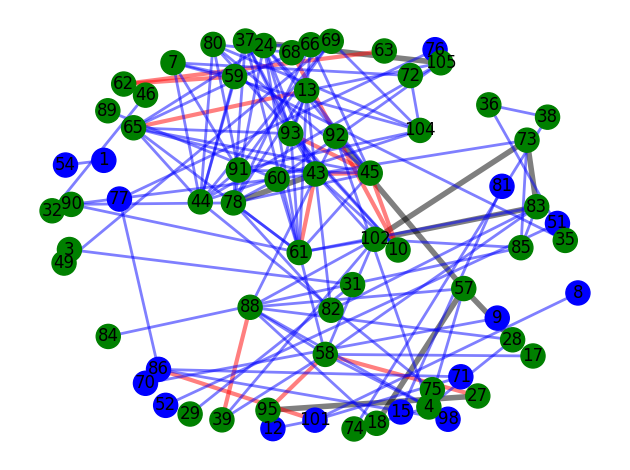

In [56]:
data1 = combined(3, verified='verified', popularity_lower=0, popularity_upper=10_000_000_000, x=0.20)
data2 = combined(3, verified='nonverified', popularity_lower=0, popularity_upper=10_000_000_000, x=0.20)
draw_weighted_graph_different_nodes(data1, data2)

Po zdjeciu wymagania popularnosci, a uwzglednieniu weryfikacji kanalu, zgodnie z oczekiwaniami przewage zyskaly kanaly osob fizycznych (lub wystepujacych w charakterze osoby pelniacej okreslony zawod, np. nr 77, Pan Oleg Astrolog) i to na nich sie skupiono.

W tej grupie posrod kanalow o najwiekszej ilosci wspolnych zrodel, znalazlo sie sporo kanalow, ktore sa kanalami regionu/krain geograficznych (Mikolajow, Lwow, Donietsk). Tematyka tych kanalow byla typowo wojenna.  

Kanaly zweryfikowane w tej grupie byly kanalami popularnymi uwzglednionymi w poprzednim punkcie. Zaden z kanalow zweryfikowanych nie mial ponizej 1000 subskrybentow. 

In [65]:
get_node_info_by_id(77)

{'channel_name': 'oleg_persidski',
 'full_name': 'Астролог | Олег Персидский',
 'verified': True,
 'cited_sources': ['numeromagic.ru',
  'instagram.com',
  't.me',
  'vk.com',
  'dzen.ru',
  'twitter.com/oleg_persidski',
  'wa.me',
  'course.esomind.com',
  'astronum-sale.esomind.com',
  'astrostore.ru',
  'zen.yandex.ru',
  'telesco.pe',
  'youtu.be',
  'youtube.com',
  't-do.ru',
  'mir24.tv',
  'cosmo.ru',
  'nastroenie.tv',
  'somanyhorses.ru'],
 'source_count': {'numeromagic.ru': 2545,
  'instagram.com': 16,
  't.me': 80,
  'vk.com': 14,
  'dzen.ru': 5,
  'twitter.com/oleg_persidski': 3,
  'wa.me': 48,
  'course.esomind.com': 2,
  'astronum-sale.esomind.com': 2,
  'astrostore.ru': 31,
  'zen.yandex.ru': 2,
  'telesco.pe': 1,
  'youtu.be': 4,
  'youtube.com': 2,
  't-do.ru': 1,
  'mir24.tv': 1,
  'cosmo.ru': 1,
  'nastroenie.tv': 2,
  'somanyhorses.ru': 1},
 'n_all_citations': 2761,
 'n_all_sources': 19}

# Node similarity

In [10]:
x = combined(3, verified='verified', popularity_lower=0, popularity_upper=10_000_000_000, x=0.3)
y = combined(3, verified='nonverified', popularity_lower=0, popularity_upper=10_000_000_000, x=0.3)
G1 = nx.Graph()
G2 = nx.Graph()
G1.add_weighted_edges_from(x)
G2.add_weighted_edges_from(y)
nx.graph_edit_distance(G1, G2)

ModuleNotFoundError: No module named 'scipy'